# 서울시 따릉이 자전거 2015년 대여량 데이터를 분석하세요

#한글적용

In [1]:
# 코랩 한글 적용
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 코랩 한글 적용 후 런타임 재시작
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rc('axes', unicode_minus=False)


Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0 cuda-nsight-10-0
  cuda-nsight-10-1 cuda-nsight-11-0 cuda-nsight-11-1 cuda-nsight-compute-10-0
  cuda-nsight-compute-10-1 cuda-nsight-compute-11-0 cuda-nsight-comp

#데이터

In [185]:
# 서울시 따릉이 자전거 2015년 대여량 데이터를 읽어 bicycle에 저장하세요
# 2015년 이후 데이터는 너무 커서 시간이 많이 걸림
import pandas as pd
filename="https://raw.githubusercontent.com/KimYounghwan/bigdata/master/%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C%20%EA%B3%B5%EA%B3%B5%EC%9E%90%EC%A0%84%EA%B1%B0%20%EB%8C%80%EC%97%AC%EC%9D%B4%EB%A0%A5%20%EC%A0%95%EB%B3%B4_2015%EB%85%84.csv"

bicycle=pd.read_csv(filename,encoding='euc-kr')

In [7]:
# bicycle의 구조를 출력하세요
bicycle.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107858 entries, 0 to 107857
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   자전거번호     107858 non-null  object
 1   대여일시      107858 non-null  object
 2   대여소번호     107858 non-null  object
 3   대여소명      107858 non-null  object
 4   거치대번호     107858 non-null  int64 
 5   반납일시      107858 non-null  object
 6   반납대여소번호   107858 non-null  object
 7   반납대여소명    107858 non-null  object
 8   반납 거치대번호  107858 non-null  int64 
 9   이용시간      107858 non-null  int64 
 10  이용거리      107858 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 9.1+ MB


In [8]:
# bicycle의 앞부분 5줄만 출력하시오
bicycle.head()


,자전거번호,대여일시,대여소번호,대여소명,거치대번호,반납일시,반납대여소번호,반납대여소명,반납 거치대번호,이용시간,이용거리
0,SPB-00186,2015-09-19 0:59,115,사루비아 빌딩 앞,5,2015-09-19 2:39,115,사루비아 빌딩 앞,5,98,15240
1,SPB-00403,2015-09-19 1:22,112,극동방송국 앞,3,2015-09-19 6:09,102,망원역 1번출구 앞,16,286,10910
2,SPB-00485,2015-09-19 1:32,112,극동방송국 앞,1,2015-09-19 6:09,102,망원역 1번출구 앞,15,276,11000
3,SPB-00292,2015-09-19 7:52,221,여의도초교 앞,2,2015-09-19 8:56,221,여의도초교 앞,1,63,16500
4,SPB-00270,2015-09-19 8:56,221,여의도초교 앞,3,2015-09-19 9:05,210,IFC몰,2,8,1870


In [25]:
# 사용된 자전거 댓수를 출력하세요
len(bicycle['자전거번호'].unique())

1265

In [15]:
# 대여일시의 종류의 갯수를 출력하세요.
len(bicycle['대여일시'].unique())

60053

In [29]:
# 대여소의 갯수를 출력하세요.
bicycle['대여소명'].nunique()

145

In [19]:
# 전체 이용시간의 요약 통계량을 출력하세요
bicycle['이용시간'].describe()

count    107858.000000
mean         28.014241
std          37.000170
min           2.000000
25%           7.000000
50%          16.000000
75%          40.000000
max        1321.000000
Name: 이용시간, dtype: float64

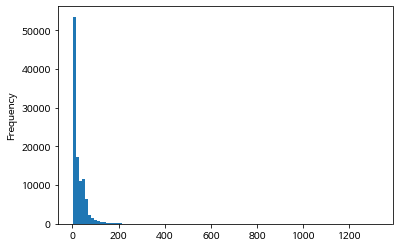

In [30]:
# 전체 이용시간의 분포그래프을 출력하세요(간격갯수는100)
bicycle['이용시간'].plot.hist(bins=100)

In [31]:
# 전체 이용거리의 요약 통계량을 출력하세요
bicycle['이용거리'].describe()

count    107858.000000
mean       3192.462961
std        3470.151724
min           0.000000
25%        1090.000000
50%        1940.000000
75%        4030.000000
max       55550.000000
Name: 이용거리, dtype: float64

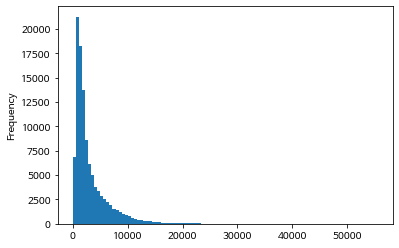

In [33]:
# 전체 이용거리의 분포그래프을 출력하세요(간격갯수는100)
bicycle['이용거리'].plot.hist(bins=100)

In [186]:
# 대여일시칼럼을 datetime 타입으로 변환, 년,월,일, 시, 요일 칼럼으로 나누세요.
# 요일명은 Series.dt.day_name() 사용
# 앞부분 5줄만 출력하세요
bicycle['대여일시']=pd.to_datetime(bicycle['대여일시'])
bicycle['년'] = bicycle['대여일시'].dt.year
bicycle['월'] = bicycle['대여일시'].dt.month
bicycle['일'] = bicycle['대여일시'].dt.day
bicycle['시'] = bicycle['대여일시'].dt.hour
week_names = ["월","화","수","목","금","토","일"]
bicycle_dt_week = bicycle['대여일시'].dt.day_of_week # Timestamp타입 시리즈에서 요일값(숫자) 추출
wk_list = [ week_names[wk] for wk in bicycle_dt_week  ] #요일값(숫자)를 요일문자로 변환
bicycle["요일"]  = wk_list # 요일문자 리스트를 exec_week칼럼에 저장
bicycle

,자전거번호,대여일시,대여소번호,대여소명,거치대번호,반납일시,반납대여소번호,반납대여소명,반납 거치대번호,이용시간,이용거리,년,월,일,시,요일
0,SPB-00186,2015-09-19 00:59:00,115,사루비아 빌딩 앞,5,2015-09-19 2:39,115,사루비아 빌딩 앞,5,98,15240,2015,9,19,0,토
1,SPB-00403,2015-09-19 01:22:00,112,극동방송국 앞,3,2015-09-19 6:09,102,망원역 1번출구 앞,16,286,10910,2015,9,19,1,토
2,SPB-00485,2015-09-19 01:32:00,112,극동방송국 앞,1,2015-09-19 6:09,102,망원역 1번출구 앞,15,276,11000,2015,9,19,1,토
3,SPB-00292,2015-09-19 07:52:00,221,여의도초교 앞,2,2015-09-19 8:56,221,여의도초교 앞,1,63,16500,2015,9,19,7,토
4,SPB-00270,2015-09-19 08:56:00,221,여의도초교 앞,3,2015-09-19 9:05,210,IFC몰,2,8,1870,2015,9,19,8,토
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107853,SPB-00668,2015-12-31 23:29:00,102,망원역 1번출구 앞,16,2015-12-31 23:36,108,서교동 사거리,10,6,940,2015,12,31,23,목
107854,SPB-00610,2015-12-31 23:43:00,105,합정역 5번출구 앞,5,2015-12-31 23:51,113,홍대입구역 2번출구 앞,22,7,1310,2015,12,31,23,목
107855,SPB-00502,2015-12-31 23:45:00,207,여의나루역 1번출구 앞,21,2015-12-31 23:51,221,여의도초교 앞,3,5,770,2015,12,31,23,목
107856,SPB-00827,2015-12-31 23:45:00,104,합정역 1번출구 앞,1,2015-12-31 23:54,113,홍대입구역 2번출구 앞,20,8,1190,2015,12,31,23,목


In [53]:
# 월별 평균 대여건수를 출력하세요. 단, 칼럼명은 반드시 대여건수이어야한다.
# 이건 월별 평균 대여건수가 아닌 월별 총 대여건수...
a=bicycle.pivot_table(
    index='월',
    values='대여일시',
    aggfunc='count'
)
a.columns=['대여건수']
a

,대여건수
월,
9,10863
10,38735
11,36398
12,21862


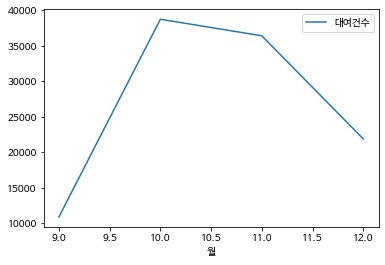

In [54]:
# 월별 평균 대여건수 선그래프를 출력하세요 월별 총 대여건수
a.plot()

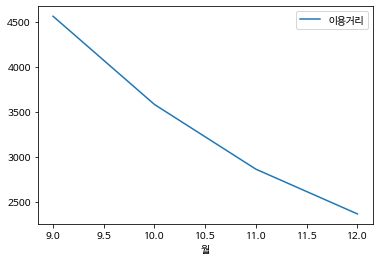

In [60]:
# 월별 평균 이용거리 선그래프를 출력하세요
bicycle.pivot_table(
    index='월',
    values='이용거리',
    aggfunc='mean'
).plot()

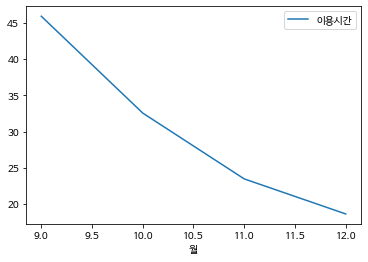

In [61]:
# 월별 평균 이용시간 선그래프를 출력하세요
bicycle.pivot_table(
    index='월',
    values='이용시간',
    aggfunc='mean'
).plot()

In [64]:
# 요일 순서 지정
# 인덱스 순서 변경은 Series.reindex( ... ) 사용
week_names

['월', '화', '수', '목', '금', '토', '일']

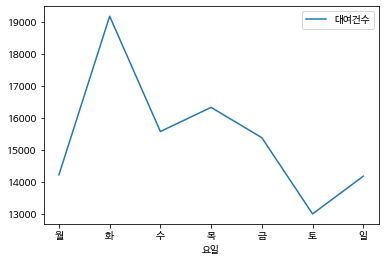

In [80]:
# 요일별 대여건수 선그래프를 출력하세요
b=bicycle.pivot_table(
    index='요일',
    values='대여일시',
    aggfunc='count'
).reindex(index=week_names)
b.columns=['대여건수']
b.plot()

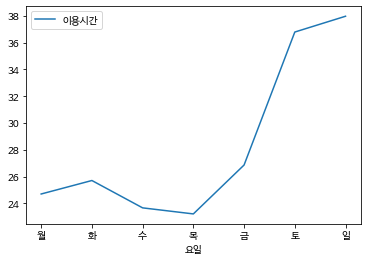

In [86]:
# 요일별 평균 이용시간 선그래프를 출력하세요
bicycle.pivot_table(
    index='요일',
    values='이용시간',
    aggfunc='mean'
).reindex(index=week_names).plot()

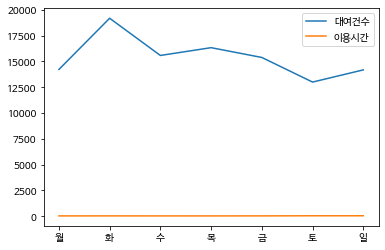

In [82]:
# 요일별 대여건수와 이용시간 선그래프를 같이 출력하세요
# 답 1
import matplotlib.pyplot as plt
plt.figure()
plt.plot(
    b.index,
    b.values,
    label='대여건수'
)
plt.plot(
    bb.index,
    bb.values,
    label='이용시간'
)
plt.legend()
plt.show()


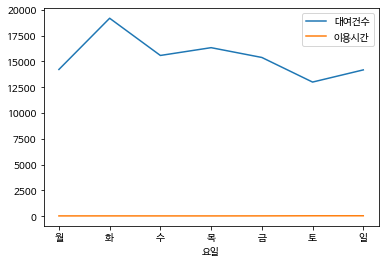

In [88]:
# 답 2
ac=bicycle.pivot_table(
    index='요일',
    values='이용시간',
    aggfunc=['count','mean']
).reindex(index=week_names)
ac.columns=['대여건수','이용시간']
ac.plot()

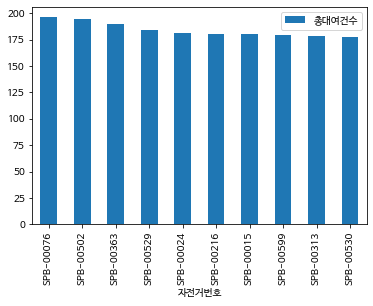

In [79]:
# 자전거별 총대여건수 top 10의 막대그래프를 출력하세요
c=bicycle.pivot_table(
    index='자전거번호',
    values='이용시간',
    aggfunc='count'
)
c.columns=['총대여건수']
c.sort_values('총대여건수',ascending=False).head(10).plot.bar()


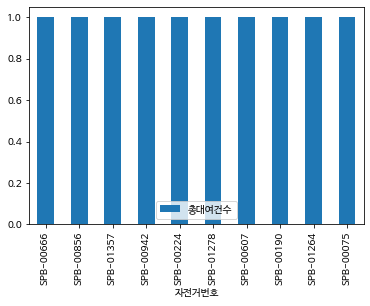

In [221]:
# 자전거별 총대여건수 top 10의 막대그래프를 출력하세요
c=bicycle.pivot_table(
    index='자전거번호',
    values='이용시간',
    aggfunc='count'
)
c.columns=['총대여건수']
c.sort_values('총대여건수').head(10).plot.bar()

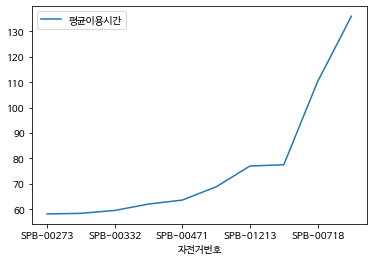

In [90]:
# 자전거별 평균이용시간 top 10의 선그래프를 출력하세요
ccc=bicycle.pivot_table(
    index='자전거번호',
    values='이용시간',
    aggfunc='mean'
)
ccc.columns=['평균이용시간']
ccc.sort_values('평균이용시간',ascending=True).tail(10).plot()

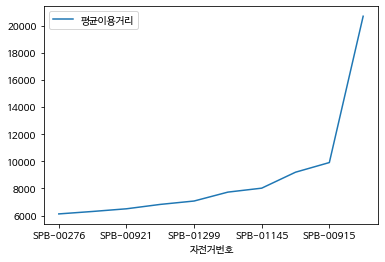

In [91]:
# 자전거별 평균 이용거리 선그래프를 출력하세요
ccc1=bicycle.pivot_table(
    index='자전거번호',
    values='이용거리',
    aggfunc='mean'
)
ccc1.columns=['평균이용거리']
ccc1.sort_values('평균이용거리',ascending=True).tail(10).plot()

In [150]:
# 대여건수 1등과 꼴등 대여소의 월별 평균 대여건수를 선그래프로 출력하세요. X축은 월
# 대여소 전체 평균 대여건수의 선그래프를 추가하세요
ga=bicycle.pivot_table(
    index='대여소명',
    values='이용시간',
    aggfunc='count'
).sort_values('이용시간',ascending=False)
ga.columns=['대여건수']
ga1=ga.head(1)
ga1=ga1.append(ga.tail(1))
gam=ga.values.mean()
ga1

,대여건수
대여소명,
홍대입구역 2번출구 앞,2756
가회동 주민센터 옆(미설치),2


In [151]:
gam

743.8482758620689

In [152]:
ga2=bicycle[bicycle['대여소명']==ga1.index[0]]
ga2=ga2.append(bicycle[bicycle['대여소명']==ga1.index[1]])

<Figure size 432x288 with 0 Axes>

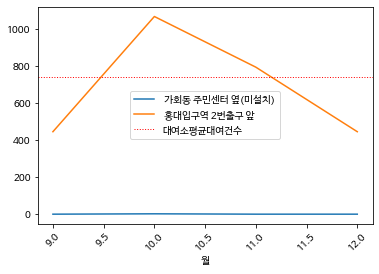

In [153]:
plt.figure()
ga3=ga2.pivot_table(
    index='월',
    columns='대여소명',
    values='이용시간',
    aggfunc='count'
).fillna(0).plot()
plt.axhline(y=gam, color='r', linewidth=1,label='대여소평균대여건수',linestyle=':')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [155]:
# 대여건수 1등과 꼴등 자전거의 월별 평균 대여건수를 선그래프로 출력하세요. X축은 월
# 자전거 전체 평균 대여건수의 선그래프를 추가하세요
gaa=bicycle.pivot_table(
    index='자전거번호',
    values='이용시간',
    aggfunc='count'
).sort_values('이용시간',ascending=False)
gaa.columns=['대여건수']
gaa1=gaa.head(1)
gaa1=gaa1.append(gaa.tail(1))
gaam=gaa.values.mean()
gaa1

,대여건수
자전거번호,
SPB-00076,196
SPB-00666,1


In [159]:
gaam

85.26324110671936

<Figure size 432x288 with 0 Axes>

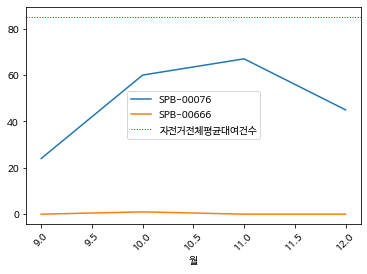

In [158]:
gaa2=bicycle[bicycle['자전거번호']==gaa1.index[0]]
gaa2=gaa2.append(bicycle[bicycle['자전거번호']==gaa1.index[1]])
plt.figure()
gaa3=gaa2.pivot_table(
    index='월',
    columns='자전거번호',
    values='이용시간',
    aggfunc='count'
).fillna(0).plot()
plt.axhline(y=gaam, color='r', linewidth=1,label='자전거전체평균대여건수',linestyle=':')
plt.xticks(rotation=45)
plt.legend()
plt.show()

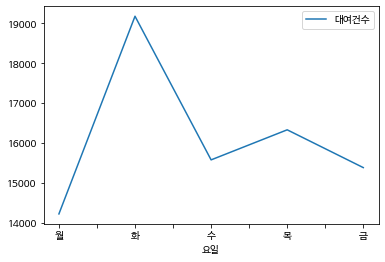

In [259]:
# 평일 요일(월화수목금)별 평균 대여량을 선그래프로 출력하세요. X축은 평일 요일
waa=bicycle[~bicycle['요일'].isin(['토','일'])].pivot_table(
    index='요일',
    values='이용시간',
    aggfunc='count'
).reindex(index=week_names)
waa.columns=['대여건수']
waa.plot()

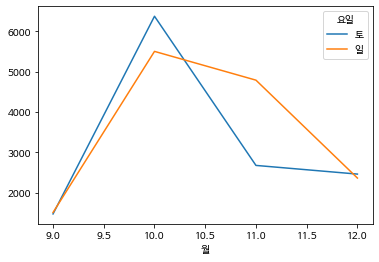

In [261]:
# 월별 주말의 평균 대여량을 선그래프로 출력하세요. X축은 월
bicycle.pivot_table(
    index='월',
    columns='요일',
    values='이용시간',
    aggfunc='count'
).loc[:,['토','일']].plot()

#날씨함수

In [177]:
# 아래는 년월입력시 해당 월의 전체의 날씨와 평균기온, 최고기온, 최저기온, 평균운량, 일강수량을 반환하는 함수이다
def get_weather(year, month, debug=False):
  '''
    year와 month에 해당하는 날짜의 맑음, 비, 평균기온, 최고기온, 최저기온, 평균운량, 일강수량 정보를 DataFrame으로 반환한다
  '''
  import pandas as pd
  url=f"https://www.weather.go.kr/w/obs-climate/land/past-obs/obs-by-day.do?stn=108&yy={year}&mm={month}&obs=1"
  w = pd.read_html(url, encoding="utf-8")
  평균기온=[]
  최고기온=[]
  최저기온=[]
  평균운량=[]
  일강수량=[]
  w_info=[]
  for i in range(1, len(w[1]), 2): #날씨정보는 홀수번째 행에 저장중.
    day_weather = w[1].loc[i] #홀수번째행 추출
    for wt in day_weather : #홀수번째 행의 각 칼럼 추출
      if pd.isna(wt): # 칼럼에 값이 없으면 다음 칼럼으로
        continue
      w_info.append(wt) # 칼럼에 값이 있으면 w_info에 저장
      wt_sp = wt.split()
      평균기온.append(wt_sp[0].split(":")[1].split("℃")[0])
      최고기온.append(wt_sp[1].split(":")[1].split("℃")[0])
      최저기온.append(wt_sp[2].split(":")[1].split("℃")[0])
      평균운량.append(wt_sp[3].split(":")[1])
      일강수량.append(wt_sp[4].split(":")[1])
      일강수량 = [ "0" if rain.strip()=="" or rain.endswith("0.0mm") else rain.split("mm")[0] for rain in 일강수량 ]
  if debug: # 디버그 옵션이 True이면 중간 결과물 출력
    display(w_info)
    print("날씨정보 길이:",len(w_info))
    display("일강수량:",일강수량)
  w_info2=[] # 날씨만 담을 리스트
  for wi in w_info:
    # print(wi.split()[-1])
    if not wi.endswith("mm"): # 정보글자가 강수량인 mm로 안끝나면 맑음
      w_info2.append("맑음")
      continue
    if wi.split(":")[-1]=="0.0mm": # 정보글자가 0.0mm로 안끝나면 맑음
      w_info2.append("맑음")
      continue
    w_info2.append("비") # 강수량 정보가 있으면 비
  if debug:
    display(w_info2)
  date_info2 = [] # 날짜정보 저장용  yyyy-mm-dd
  for i in range(1, len(w_info2)+1):
    date_info2.append( f"{year}-{month:02d}-{i:02d}"   )
  if debug:
    display(date_info2)
  weather_info = pd.DataFrame(
      [date_info2,평균기온,최고기온,최저기온,평균운량,일강수량, w_info2], 
      index=["날짜","평균기온","최고기온","최저기온","평균운량","일강수량","날씨"],
      dtype=float).T
  weather_info["평균기온"]=weather_info["평균기온"].astype(float)
  weather_info["최고기온"]=weather_info["최고기온"].astype(float)
  weather_info["최저기온"]=weather_info["최저기온"].astype(float)
  weather_info["평균운량"]=weather_info["평균운량"].astype(float)
  weather_info["일강수량"]=weather_info["일강수량"].astype(float)
  return weather_info


#날씨문제

In [178]:
# 사용예 2015년 9월 날씨 추출
wt = get_weather(2015,9) 
# display(wt)
# display(wt.info())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Could not cast to float64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised
  


In [179]:
# 날씨정보를 추출하여 bicycle과 연결하세요
wt9 = get_weather(2015,9) 
wt10 = get_weather(2015,10) 
wt11 = get_weather(2015,11) 
wt12 = get_weather(2015,12)
wt = wt9.append(wt10)
wt = wt.append(wt11)
wt = wt.append(wt12)
wt = wt.sort_values(by='날짜')
wt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Could not cast to float64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Could not cast to float64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Could not cast to float64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised
  after removing the cwd fr

,날짜,평균기온,최고기온,최저기온,평균운량,일강수량,날씨
0,2015-09-01,25.9,30.7,22.6,7.4,0.0,맑음
1,2015-09-02,23.9,27.7,22.0,8.5,0.5,비
2,2015-09-03,23.9,28.2,19.8,4.1,18.0,비
3,2015-09-04,24.8,30.7,20.6,5.0,0.0,맑음
4,2015-09-05,21.9,23.6,19.4,9.4,5.0,비
...,...,...,...,...,...,...,...
26,2015-12-27,-5.7,-1.0,-8.9,0.0,0.0,맑음
27,2015-12-28,-5.7,-1.0,-9.5,0.0,0.0,맑음
28,2015-12-29,-3.2,2.9,-8.7,3.8,0.0,맑음
29,2015-12-30,0.3,4.3,-3.5,6.9,2.5,비


In [187]:
bicycle['날짜'] = bicycle['대여일시'].apply(lambda x:x.strftime('%Y-%m-%d'))
bicycle.head()

,자전거번호,대여일시,대여소번호,대여소명,거치대번호,반납일시,반납대여소번호,반납대여소명,반납 거치대번호,이용시간,이용거리,년,월,일,시,요일,날짜
0,SPB-00186,2015-09-19 00:59:00,115,사루비아 빌딩 앞,5,2015-09-19 2:39,115,사루비아 빌딩 앞,5,98,15240,2015,9,19,0,토,2015-09-19
1,SPB-00403,2015-09-19 01:22:00,112,극동방송국 앞,3,2015-09-19 6:09,102,망원역 1번출구 앞,16,286,10910,2015,9,19,1,토,2015-09-19
2,SPB-00485,2015-09-19 01:32:00,112,극동방송국 앞,1,2015-09-19 6:09,102,망원역 1번출구 앞,15,276,11000,2015,9,19,1,토,2015-09-19
3,SPB-00292,2015-09-19 07:52:00,221,여의도초교 앞,2,2015-09-19 8:56,221,여의도초교 앞,1,63,16500,2015,9,19,7,토,2015-09-19
4,SPB-00270,2015-09-19 08:56:00,221,여의도초교 앞,3,2015-09-19 9:05,210,IFC몰,2,8,1870,2015,9,19,8,토,2015-09-19


In [188]:
bicycle2 = bicycle.merge(wt, on='날짜')
bicycle2.head()

,자전거번호,대여일시,대여소번호,대여소명,거치대번호,반납일시,반납대여소번호,반납대여소명,반납 거치대번호,이용시간,이용거리,년,월,일,시,요일,날짜,평균기온,최고기온,최저기온,평균운량,일강수량,날씨
0,SPB-00186,2015-09-19 00:59:00,115,사루비아 빌딩 앞,5,2015-09-19 2:39,115,사루비아 빌딩 앞,5,98,15240,2015,9,19,0,토,2015-09-19,22.3,29.0,17.0,2.6,0.0,맑음
1,SPB-00403,2015-09-19 01:22:00,112,극동방송국 앞,3,2015-09-19 6:09,102,망원역 1번출구 앞,16,286,10910,2015,9,19,1,토,2015-09-19,22.3,29.0,17.0,2.6,0.0,맑음
2,SPB-00485,2015-09-19 01:32:00,112,극동방송국 앞,1,2015-09-19 6:09,102,망원역 1번출구 앞,15,276,11000,2015,9,19,1,토,2015-09-19,22.3,29.0,17.0,2.6,0.0,맑음
3,SPB-00292,2015-09-19 07:52:00,221,여의도초교 앞,2,2015-09-19 8:56,221,여의도초교 앞,1,63,16500,2015,9,19,7,토,2015-09-19,22.3,29.0,17.0,2.6,0.0,맑음
4,SPB-00270,2015-09-19 08:56:00,221,여의도초교 앞,3,2015-09-19 9:05,210,IFC몰,2,8,1870,2015,9,19,8,토,2015-09-19,22.3,29.0,17.0,2.6,0.0,맑음


In [189]:
# 월별 날씨(맑음,비)별 평균 대여량을 출력하세요. X축은 월
bicycle2.pivot_table(
    index='월',
    columns='날씨',
    values='대여일시',
    aggfunc='count'
).fillna(0)

날씨,맑음,비
월,,
9,10863.0,0.0
10,31349.0,7386.0
11,26494.0,9904.0
12,16495.0,5367.0


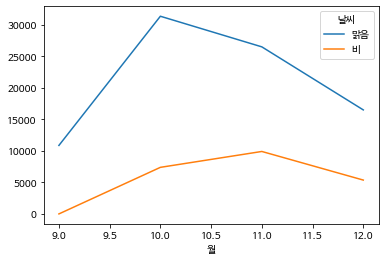

In [190]:
# 월별 날씨(맑음,비)별 평균 대여량을 선그래프로 출력하세요. X축은 월
bicycle2.pivot_table(
    index='월',
    columns='날씨',
    values='대여일시',
    aggfunc='count'
).fillna(0).plot()

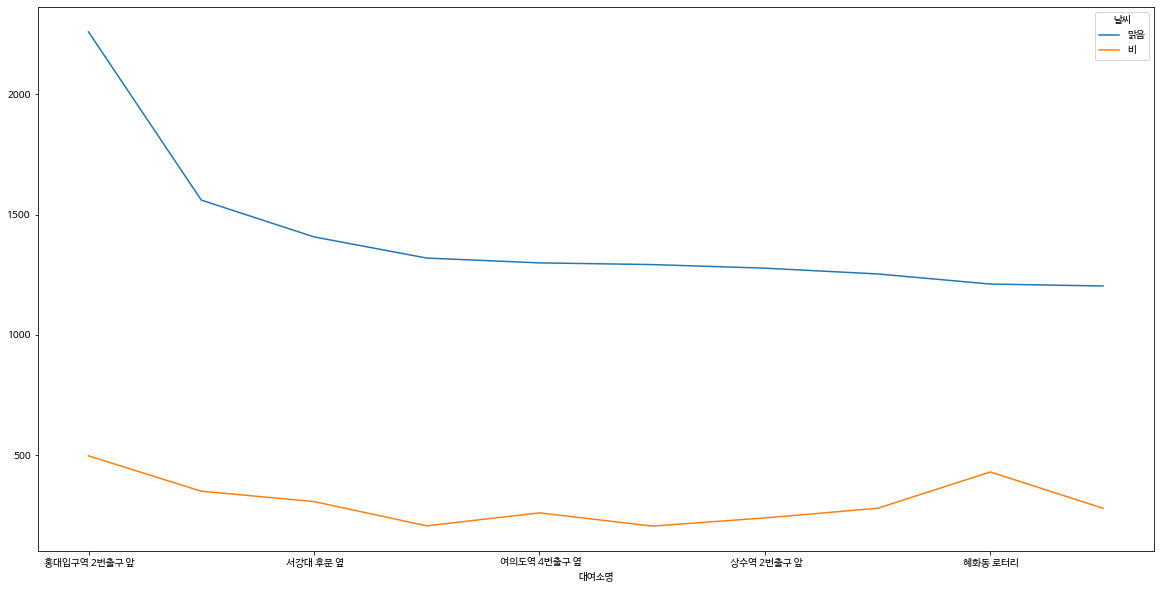

In [264]:
# 날씨(맑음,비)별 평균 대여량이 가장 많은 대여소 top 10의 평균 대여량을 선그래프로 출력하세요. X축은 대여소명
abm=bicycle2.pivot_table(
    index='대여소명',
    columns='날씨',
    values='대여일시',
    aggfunc='count'
).fillna(0).sort_values(['맑음','비'],ascending=[False,False]).head(10)
abm.plot(figsize=(20,10))


In [250]:
# 월별 평균기온과 최고 기온과 평균 대여량의 선그래프를 출력하세요. X축은 월
asd=bicycle2.pivot_table(
    index='월',
    values=['평균기온','최고기온'],
    aggfunc='mean'
)
asd1=bicycle2.pivot_table(
    index='월',
    values='이용시간',
    aggfunc='count'
)
asd1.columns=['대여건수']

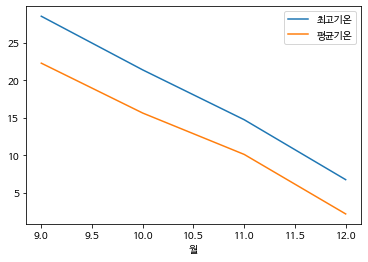

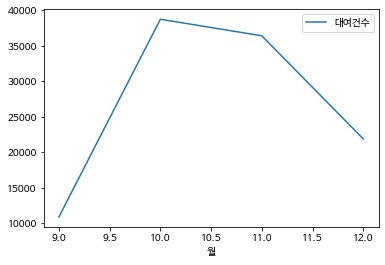

In [270]:
# 월별 평균기온과 최고 기온과 평균 대여량의 선그래프를 출력하세요. X축은 월
asd.plot()
asd1.plot()

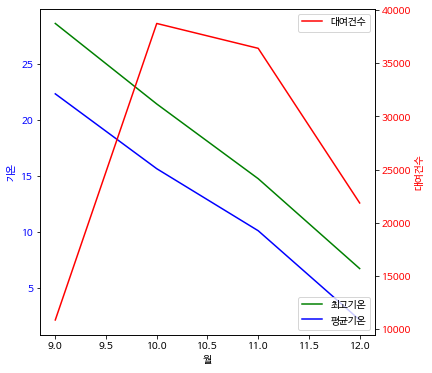

In [288]:
asd12=bicycle2.pivot_table(
    index='월',
    values='평균기온',
    aggfunc='mean'
)
asd121=bicycle2.pivot_table(
    index='월',
    values='최고기온',
    aggfunc='mean'
)
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot()
 
ax1.plot(asd.index, asd121.values, color='g',label='최고기온')
ax1.plot(asd.index, asd12.values, color='b',label='평균기온')
ax1.set_xlabel('월')

ax1.set_ylabel('기온', color='b')
ax1.tick_params(axis='y', labelcolor='b')
 

ax2 = ax1.twinx()
ax2.plot(asd.index, asd1.values, color='r',label='대여건수')
ax2.set_ylabel('대여건수', color='r')
ax2.tick_params(axis='y', labelcolor='r')
ax1.legend(loc=4)
ax2.legend()
plt.show()